In [9]:
from qiskit import *
import numpy as np
from qiskit.primitives import *

# Task 1

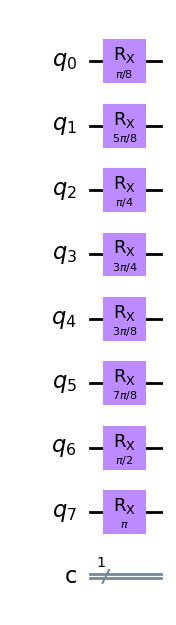

In [94]:
## Data embedding

Angle_embedding = QuantumCircuit(8,1)

## Because abs(rx(pi + theta))**2 = abs(rx(theta)**2), we have to normalize the value
inputs = [1,5,2,6,3,7,4,8]
max_value = np.max(inputs)
min_value = np.min(inputs)
normal_list = (np.array(inputs))/(max_value)*np.pi


for index, i in  enumerate(normal_list):
    Angle_embedding.rx(i,index)
    
Angle_embedding.draw('mpl')

When we measure the value in Z axis,

The state is $\cos(\theta/2)|0> + \sin(\theta/2)|1>$

And measure result for |0> probability is $\cos^2(\theta/2)$

So we can get $\theta$ $\cos^-1\sqrt{0_{prob}}$

In [115]:
sampler = Sampler()
res_list = []
for i in range(8):
    temp_circ = Angle_embedding.copy()
    temp_circ.measure(i,0)
    result = sampler.run(temp_circ,shots = 6000).result().quasi_dists[0]
    try:
        res_list.append(result[0])
    except:
        res_list.append(0)
res_list = np.array(res_list)

In [116]:
## The value is 0 ~ 1 and

print('Reconstructed value : ',res_list)

Reconstructed value :  [0.96166667 0.307      0.8585     0.143      0.6815     0.03783333
 0.49733333 0.        ]


In [123]:
# Multiply the max value
print('input list :',np.array(inputs))
print('Reconstructed value :',np.round(np.arccos(np.sqrt(res_list))*2/np.pi*max_value,2))

input list : [1 5 2 6 3 7 4 8]
Reconstructed value : [1.   5.01 1.96 6.02 3.05 7.   4.01 8.  ]
